In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import sys
from operator import itemgetter

import seaborn
from matplotlib import pyplot

logging.basicConfig(stream=sys.stdout, level=logging.getLevelName('DEBUG'))

def plot_rdm(similarities, title, ax):
    labels = map(itemgetter(0), similarities['stimulus'].values)
    labels = [label[:20] for label in labels]
    seaborn.heatmap(similarities, ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(labels, rotation=90)
    ax.get_yaxis().set_visible(False)

def plot_rdms(rdm_titles, axes):
    for (rdm, title), ax in zip(rdm_titles, axes):
        plot_rdm(rdm, title, ax)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Neural Data

In [4]:
from neural_nlp.neural_data import load_rdm_sentences
from neural_nlp.stimuli import load_stimuli

neural_data = load_rdm_sentences()
del neural_data['timepoint']  # this otherwise messes up the MultiIndex (level_0)
neural_data = neural_data.mean(dim='subject')

sentences = load_stimuli('naturalistic-neural-reduced.Boar')
boar_data = neural_data.sel(stimulus=sentences)


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r01.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r02.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r03.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r04.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r05.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r06.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r07.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r08.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r09.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r10.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r11.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r12.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r13.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r14.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r15.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r16.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r17.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r18.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r19.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r20.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r21.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r22.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r23.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r24.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r25.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r26.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r27.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r28.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r29.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r30.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r31.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r32.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r33.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r34.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r35.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r36.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r37.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r38.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r39.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r40.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r41.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r42.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r43.csv


DEBUG:neural_nlp.neural_data:Loading file /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/Boar_from90to100.mat_r44.csv


DEBUG:neural_nlp.neural_data:Loading meta /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/meta/story1_Boar_sentencesByTR.csv


DEBUG:neural_nlp.neural_data:Loading meta /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../ressources/neural_data/meta/story1_Boar_sentencesByTR.csv


In [10]:
%matplotlib inline
import numpy as np

num_rows_cols = int(np.ceil(np.sqrt(len(boar_data['region']))))
fig, axes = pyplot.subplots(num_rows_cols, num_rows_cols)

generator = ((boar_data.sel(region=region), region) for region in boar_data['region'])
plot_rdms(generator, axes.flatten())

pyplot.savefig('results/RDM-neural.svg')
pyplot.savefig('results/RDM-neural.png')
fig.show()

## Models

In [15]:
% env MKL_THREADING_LAYER=GNU
models = ['skip-thoughts', 'lm_1b']#, 'rntn']


env: MKL_THREADING_LAYER=GNU


DEBUG:neural_nlp.utils.store:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../output/neural_nlp.models.get_activations/model_name=skip-thoughts,stimulus_set_name=naturalistic-neural-reduced.Boar.pkl


DEBUG:neural_nlp.utils.store:Loading from storage: /mnt/c/Users/Martin/workspaces/tenenbaum/neural-nlp/neural_nlp/../output/neural_nlp.models.get_activations/model_name=lm_1b,stimulus_set_name=naturalistic-neural-reduced.Boar.pkl


/home/martin/miniconda3/envs/neural-nlp/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


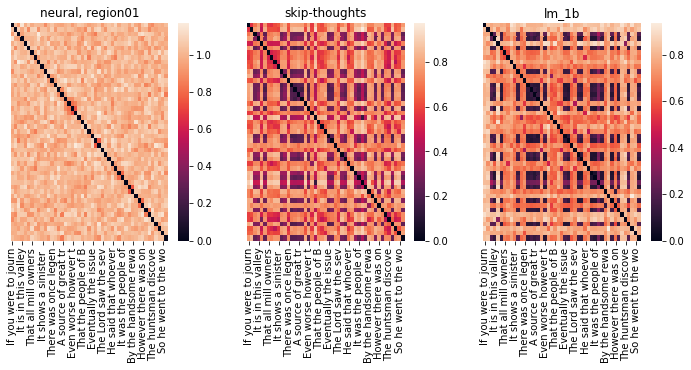

In [16]:
% matplotlib inline

from matplotlib import pyplot

from neural_nlp.models import get_activations
from neural_nlp.stimuli import load_stimuli
from mkgu.metrics.rdm import RDM

rdm = RDM()

def plot_rdms(dataset_name):
    fig, axes = pyplot.subplots(1, len(models), figsize=(12, 4))

    for model_name, ax in zip(models, axes):
        encodings = get_activations(model_name, dataset_name)  # feed in sentences in context, i.e. with continuity
        similarities = rdm(encodings)
        plot_rdm(similarities, model_name, ax)
    pyplot.savefig('results/RDM-{}.svg'.format(dataset_name))
    pyplot.savefig('results/RDM-{}.png'.format(dataset_name))
    fig.show()

plot_rdms('naturalistic-neural-reduced.Boar')
